# Correlation and Regression 

อ.ดร.ธนชาตย์ ฤทธิ์บำรุง (อ.เชค)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/04t_02_correlation_regression.ipynb)

**เป้าหมายการเรียนรู้**
1. เข้าใจถึงการวิเคราะห์หาความสัมพันธ์
2. เข้าใจถึงหลักการของ Regression Analysis
3. สามารถวิเคราะห์ Regression Analysis ได้

# Relationships are all we need

*   หัวใจสำคัญของการวิเคราะห์ข้อมูล คือ การหาความสัมพันธ์ของตัวแปร/เหตุการณ์
*   เมื่อเข้าใจถึงความสัมพันธ์ของตัวแปร/เหตุการณ์ เราจะสามารถทำนายผลลัพธ์จากผลของความสัมพันธ์ได้
*   ตัวอย่างเช่น เมื่อลูกค้ามีความถี่การใช้บริการลดลง ในอนาคตลูกค้าอาจจะมีความเสี่ยงในการยกเลิกสมาชิก
*   เครื่องจักรที่เริ่มมีเสียงดัง หรือ มีแรงสั่นสะเทือนมากขึ้น อาจจะเป็นเครื่องจักรที่กำลังจะเสีย





# Pearson's Correlation

*   Pearson's Correlation เป็นการวิเคราะห์ความสัมพันธ์ระหว่าง 2 ตัวแปรที่เป็นตัวเลข หรือ Numeric
*   การวิเคราะห์ Correlation ยังมีวิธีของ Spearman's และ Kendall’s ที่ใช้ในกรณีที่ตัวแปรไม่ใช่ Numeric (Interval and Ratio Scale)
*   Pearson's Correlation มีค่าอยู่ระหว่าง -1 และ 1
*   Pearson's Correlation เท่ากับ 1 แสดงว่ามีความสัมพันธ์อย่างสมบูรณ์แบบในทิศทางเดียวกัน
*   Pearson's Correlation เท่ากับ -1 แสดงว่ามีความสัมพันธ์อย่างสมบูรณ์แบบในทิศทางตรงกันข้ามกัน
*   Pearson's Correlation เท่ากับ 0 แสดงว่าไม่มีความสัมพันธ์กัน

In [1]:
# crate a function to generate random data from pearson's correlation

import numpy as np
import matplotlib.pyplot as plt

def gen_corr(corr):
  xx = np.array([0, 100])
  yy = np.array([10, 20])
  means = [xx.mean(), yy.mean()]  
  stds = [xx.std(), yy.std()]
  corr = corr      
  covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
          [stds[0]*stds[1]*corr,           stds[1]**2]] 

  m = np.random.multivariate_normal(means, covs, 1000).T
  plt.scatter(m[0], m[1], alpha=0.4)

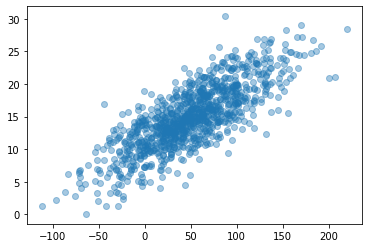

In [2]:
gen_corr(0.8)

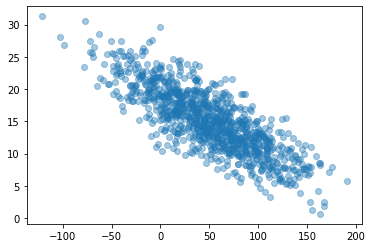

In [3]:
gen_corr(-0.8)

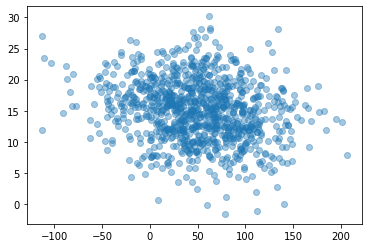

In [4]:
gen_corr(-0.2)

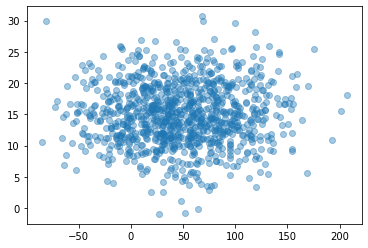

In [5]:
gen_corr(0)

C:\Users\Hery\AppData\Local\Temp\ipykernel_2052\14083717.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  m = np.random.multivariate_normal(means, covs, 1000).T


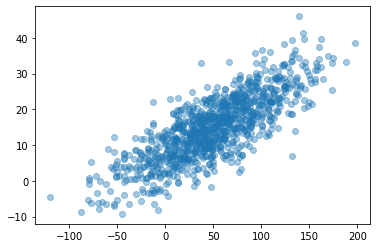

In [6]:
# try it yourself

gen_corr(1.5)

# Regression

Regression เป็นเทคนิคที่เราพยายามสร้างสมการขึ้นมาเพื่อแสดงถึงความสัมพันธ์ระหว่างตัวแปร x และ y

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/14.png width="750px">

จากรูปด้านบน จะพบว่า เราสามารถขีดเส้นตรงได้หลากหลายเส้น

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/15.png width="750px">

เราอยากได้เส้นที่ดีที่สุด

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/16.png width="750px">

เส้นที่ดีที่สุด คือ เส้นที่มี Error น้อยที่สุด เราจึงเรียนวิธีนี้ว่า OLS หรือ Ordinary Least Square Method

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/17.png width="250px">

**Terminology**

*   x = features
*   y = labels

# Regression Model with Scikit-Learn Module

Scikit-Learn Module เป็น ไพธอนโมดูลสำหรับการวิเคราะห์ข้อมูลด้วยการใช้เทคนิคของ Machine Learning

In [7]:
# Load module ที่เราต้องการใช้ทั้งหมด

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/ai-builders/curriculum/raw/main/data/insurance.csv'
df = pd.read_csv(url)

In [9]:
# แสดงผลตัวอย่างข้อมูล

df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# คำนวณหา Pearson's Correlation

df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
# แยก dataframe ออกเป็นชุดตัวแปร x และ y

X = df[['age', 'bmi', 'children']]
y = df['charges']

In [12]:
# แยกข้อมูลออกเป็นชุดเ train และ test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# คำนวณสมการ Regression

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# ค่า b0

print(linear_reg.intercept_)

-5292.837634337056


In [15]:
# ค่า b ของแต่ละตัวแปร

print(linear_reg.coef_)

[220.5023244  298.14994213 660.21812412]


จากผลการวิเคราะห์ เราสามารถเขียนสมการได้ดังนี้


charges = -5,292.84 + 220.50 age + 298.15 bmi + 660.22 children

# การประเมินความแม่นยำของโมเดล

เราสามารถประเมินความแม่นยำหรือประสิทธิภาพโมเดลได้หลายวิธี

วิธีแรก คือ  $R^2$

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/18.png width="750px">

นอกจากนี้เรายังสามารถใช้ metrics อื่นๆ ในการวัดความแม่นยำหรือความคลาดเคลื่อนในการประมาณการได้

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/19.png width="750px">

In [16]:
# พยากรณ์ตัวแปร y ของ train dataset

y_pred_train = linear_reg.predict(X_train)

In [17]:
# หาความแม่นยำของ train dataset

print('R2:', metrics.r2_score(y_train, y_pred_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R2: 0.10672246886681236
Mean Absolute Error: 8977.736780682058
Mean Squared Error: 128065760.88993324
Root Mean Squared Error: 11316.614374004852


In [19]:
# พยากรณ์ตัวแปร y ของ test dataset

y_pred_test = linear_reg.predict(X_test)

In [20]:
# หาความแม่นยำของ test dataset

print('R2:', metrics.r2_score(y_test, y_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R2: 0.16301209866339939
Mean Absolute Error: 9016.002558195327
Mean Squared Error: 133189853.20376825
Root Mean Squared Error: 11540.790839616158


In [23]:
# สร้างเป็น function หาความแม่นยำ

def regression_metrics(x, y, model):
  y_pred = model.predict(x)
  print('R2:', metrics.r2_score(y, y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [22]:
# หาความแม่นยำของ train dataset

regression_metrics(X_train, y_train, linear_reg)

R2: 0.10672246886681236
Mean Absolute Error: 8977.736780682058
Mean Squared Error: 128065760.88993324
Root Mean Squared Error: 11316.614374004852


In [24]:
# หาความแม่นยำของ test dataset

regression_metrics(X_test, y_test, linear_reg)

R2: 0.16301209866339939
Mean Absolute Error: 9016.002558195327
Mean Squared Error: 133189853.20376825
Root Mean Squared Error: 11540.790839616158


# Regression Model ในแบบอื่นๆ

regression models มีหลากหลายรูปแบบมาก รูปแบบที่เรียนไปเรียกว่า OLS ยังมีวิธีการสร้างสมการ Regression อีกหลากหลายเทคนิคมาก เช่น Gradient Descend Method, Support Vector Regression, Neural Network Regression เป็นต้น

สามารถหาอ่านเพิ่มเติมได้จาก
https://online.datasciencedojo.com/blogs/machine-learning-algorithms

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/20.png width="1000px">

# Machine Learning Model Development Workflow

*   การพัฒนา Machine Learning Model ก็คือการหาค่า Parameters ที่ดีที่สุด
*   การหาค่า Parameters ที่ดีที่สุด เกิดขึ้นจากการลองสร้าง ML Model หลายๆ รูปแบบ เช่น เปลี่ยน Algorithm หรือ เปลี่ยนตัวแปรที่นำเข้า
*   เมื่อเราต้องการเปรียบเทียบทางเลือกในการสร้าง ML Model นั้น การใช้แค่ Train และ Test Dataset อาจจะไม่เพียงพอในการเปรียบเทียบประสิทธิภาพ
*   Cross Validation Technique จะถูกนำเข้ามาใช้เพื่อเปรียบเทียบทางเลือกในการสร้าง ML Model

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/21.png width="750px">

*   การทำ Cross-Validation จะเริ่มจากแบ่ง Dataset ออกเป็น 2 ชุด คือ Training Data และ Test Data
*   Training Data จะถูกแบ่งออกเป็น K Fold (เราสามารถกำหนด K ได้ตามที่เราต้องการ โดยทั่วไปค่าที่นิยมกำหนด ได้แก่ 3, 5, 10 ซึ่ง 10 จะเป็นค่าที่คนนิยมใช้มากที่สุด)
*   Model ทำถูกทำการสร้าง K รอบ
*   ในแต่ละรอบ จะมีข้อมูล 1 Fold ถูกแยกไว้เป็น Test Set ที่เหลือ K-1 Fold จะถูกนำมาใช้ในการสร้าง หรือ Train Model
*   เมื่อ Model ถูกสร้างเสร็จ จะนำมาทดสอบความแม่นยำกับ Test Set
*   เราจะได้ค่าความแม่นยำ K ชุด
*   ในการเปรียบเทียบ เราจะนำค่าความแม่นยำ มาหาค่าเฉลี่ยเพื่อเปรียบเทียบเลือกทางเลือกในการสร้าง ML Model ที่ดีที่สุด
*   ทางเลือกในการสร้าง ML Model ที่ดีที่สุด ก็จะถูกนำมาสร้างใหม่กับ Training Data และทดสอบกับ Test data ที่เก็บไว้ตั้งแต่ต้น













<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/22.png width="750px">

Source: https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0

# ตัวอย่างการทำ Cross Validation

In [25]:
# load function ที่ต้องการจาก scikit-learn

from sklearn.model_selection import cross_val_score

In [26]:
# สร้าง regression model จาก 3 วิธี

linear_reg = linear_model.LinearRegression()
sgd = linear_model.SGDRegressor()
ransac = linear_model.RANSACRegressor()

In [28]:
# ทำ cross validation ทีละ model

for model in [linear_reg, sgd, ransac]:
  print('Avg. R2- ' + str(model) + ': ' + str(np.mean(cross_val_score(model, X, y, cv=5))))

Avg. R2- LinearRegression(): 0.11713973976954002
Avg. R2- SGDRegressor(): -75505384708.36777
Avg. R2- RANSACRegressor(): -0.175786045533659


# การแปลงตัวแปรประเภท Categorical สำหรับใช้ในการทำ Model ด้วยเทคนิค One-hot Encoding

*   One-hot encoding เป็นการเปลี่ยนตัวแปรที่เป็นประเภท categorical ให้มาอยู่ในรูปของตัวเลข
*   โดยจะทำการสร้างตัวแปรใหม่ขึ้นมาตามจำนวนสมาชิกของข้อมูลของตัวแปรตั้งต้น
*   ตัวอย่างเช่น ตัวแปร เพศ ถ้ามีแค่ ชาย และ หญิง แปลว่ามีจำนวนสมาชิก 2 ตัว
*   ตัวแปร ภาค ถ้ามีสมาชิกได้แก่ เหนือ ตะวันออกเฉียงเหนือ กลาง ตะวันออก ตะวันตก และ ใต้ แปลว่ามีจำนวนสมาชิก 6 ตัว
*   ถ้าแถวนั้น มีค่าตรงกับตัวแปรใหม่ จะใส่ไว้เป็นเลข 1 ถ้าไม่ตรงจะใส่ไว้เป็นเลข 0







<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/23.png width="1000px">

ใน Pandas Module มี function ชื่อ get_dummies ที่สามารถจัดการเรื่อง one-hot encoding ได้

In [31]:
# สร้างตัวแปร one-hot encoding เฉพาะตัวแปรที่เป็น categorical

df_dummmies = pd.get_dummies(df[['sex','smoker','region']])
df_dummmies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [32]:
# นำ dataframe ที่มี dummy variables ไปรวมกับ dataframe ของตัวแปร X ที่สร้างไว้

X = X.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [33]:
# สร้าง train and test dataset ใหม่

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# สร้าง regression model ใหม่

linear_reg_dummies = linear_model.LinearRegression()
linear_reg_dummies.fit(X_train, y_train)

LinearRegression()

In [36]:
# ค่า b0

print(linear_reg_dummies.intercept_)

-517.1368358426407


In [37]:
# ค่า b ของแต่ละตัวแปร

print(linear_reg_dummies.coef_)

[ 2.53700500e+02  3.35962814e+02  4.36910121e+02  3.86593197e+00
 -3.86593197e+00 -5.90125432e+03  5.90125432e+03  2.41920034e+02
  1.11853668e+02 -2.14719383e+02 -1.39054319e+02  3.86593197e+00
 -3.86593197e+00 -5.90125432e+03  5.90125432e+03  2.41920034e+02
  1.11853668e+02 -2.14719383e+02 -1.39054319e+02]


จากผลการวิเคราะห์ เราสามารถเขี่ยนสมการได้ดังนี้

charges = -517.14 + 253.70 age + 335.96 bmi + 436.91 children + 7.73 sex_female -7.73	sex_male -11,802.51 smoker_no	+ 11,802.51 smoker_yes + 483.84 
region_northeast	+ 2.23.71 region_northwest	- 429.44 region_southeast	- 278.11 region_southwest

In [38]:
# หาความแม่นยำของ train dataset

regression_metrics(X_train, y_train, linear_reg_dummies)

R2: 0.7370262574551634
Mean Absolute Error: 4234.551143314703
Mean Squared Error: 37701533.128629126
Root Mean Squared Error: 6140.157418880165


In [39]:
# หาความแม่นยำของ test dataset

regression_metrics(X_test, y_test, linear_reg_dummies)

R2: 0.7999876970680434
Mean Absolute Error: 3933.2726494052376
Mean Squared Error: 31827950.22952383
Root Mean Squared Error: 5641.626558850189


# Checkpoint ท้ายบท

*   ☑️ เข้าใจถึงการวิเคราะห์หาความสัมพันธ์
*   ☑️ เข้าใจถึงหลักการของ Regression Analysis
*   ☑️ สามารถวิเคราะห์ Regression Analysis ได้